In [1]:
import torch
from reggae.utilities import save, load

from reggae.gp.variational.models import MultiLFM
from reggae.gp.variational.trainer import Trainer
from reggae.data_loaders.artificial import get_artificial_dataset
from reggae.plot.variational_plotters import Plotter
from matplotlib import pyplot as plt

import numpy as np

f64 = np.float64

In [2]:
replicate = 0
nodelay_dataset, delay_dataset = get_artificial_dataset()
p_nodelay, m_nodelay = nodelay_dataset

In [3]:
print(p_nodelay.shape)
print(m_nodelay.shape)

m_nodelay = m_nodelay[replicate]
p_nodelay = p_nodelay[replicate]
num_genes = m_nodelay.shape[0]
num_tfs = p_nodelay.shape[0]
print('num_tfs', num_tfs)

(1, 3, 100)
(1, 20, 10)
num_tfs 3


In [4]:
gene_names = np.arange(num_genes)
m_observed = torch.tensor(m_nodelay)

t_inducing = torch.linspace(f64(0), f64(1), 7, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(f64(0), f64(1), m_observed.shape[1]).view(-1)
print(t_inducing.shape)

torch.Size([7, 1])


In [5]:
model = MultiLFM(num_genes, num_tfs, t_inducing, t_observed, fixed_variance=None)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))

print(t_observed.shape, m_observed.shape)

torch.Size([10]) torch.Size([20, 10])


C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = torch.tensor(t_inducing, requires_grad=False)


### Outputs prior to training:

torch.Size([20, 80])
mean (3, 80)
mean (3, 80)
mean (3, 80)


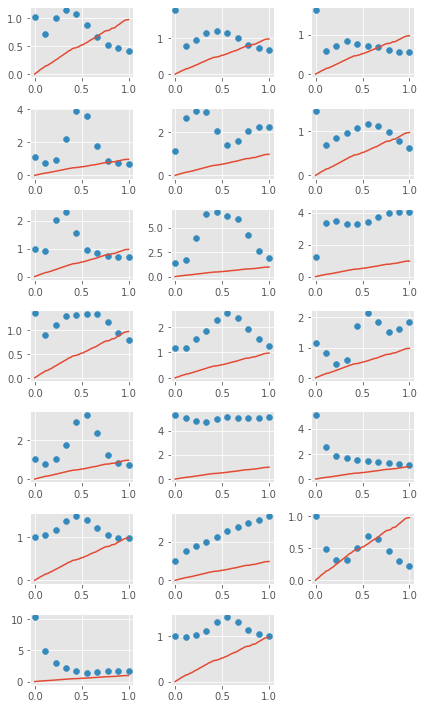

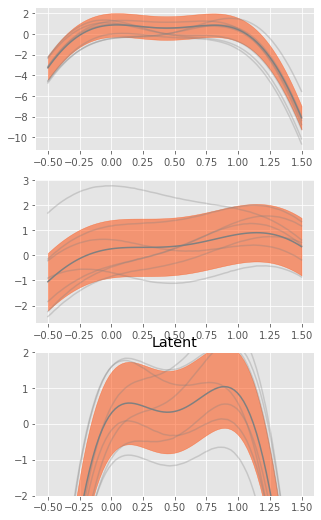

In [6]:
t_predict = torch.linspace(f64(0), f64(1), 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter = Plotter(model, gene_names, t_inducing)
plotter.plot_genes(t_predict, t_scatter=t_observed, y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs()

Epoch 61/110 - Loss: 172.19 (25.35 146.84) b: 1.99 d 7.69 s: 5.93 λ: 0.077
Epoch 62/110 - Loss: 155.87 (11.03 144.84) b: 1.98 d 7.72 s: 5.95 λ: 0.077
Epoch 63/110 - Loss: 157.81 (14.88 142.93) b: 1.96 d 7.75 s: 5.97 λ: 0.077
Epoch 64/110 - Loss: 165.52 (24.41 141.11) b: 1.91 d 7.82 s: 5.95 λ: 0.077
Epoch 65/110 - Loss: 142.84 (3.48 139.36) b: 1.87 d 7.87 s: 5.95 λ: 0.077
Epoch 66/110 - Loss: 146.25 (8.56 137.69) b: 1.82 d 7.94 s: 5.93 λ: 0.077
Epoch 67/110 - Loss: 169.50 (33.42 136.08) b: 1.84 d 7.94 s: 5.98 λ: 0.077
Epoch 68/110 - Loss: 186.59 (52.06 134.53) b: 1.91 d 7.88 s: 6.08 λ: 0.077
Epoch 69/110 - Loss: 152.80 (19.75 133.05) b: 1.97 d 7.84 s: 6.17 λ: 0.077
Epoch 70/110 - Loss: 155.11 (23.48 131.63) b: 2.02 d 7.81 s: 6.26 λ: 0.077
Epoch 71/110 - Loss: 148.38 (18.14 130.24) b: 2.01 d 7.84 s: 6.28 λ: 0.077
Epoch 72/110 - Loss: 149.72 (20.83 128.89) b: 1.94 d 7.92 s: 6.24 λ: 0.077
Epoch 73/110 - Loss: 131.33 (3.73 127.60) b: 1.88 d 8.00 s: 6.22 λ: 0.077
Epoch 74/110 - Loss: 148.82 

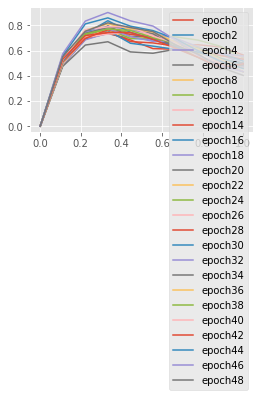

In [12]:
tol = 1e-3
# trainer = Trainer(optimizer)
output = trainer.train(50, rtol=tol, atol=tol/10, report_interval=1, plot_interval=2)

### Outputs after training

torch.Size([20, 80])
mean (3, 80)
mean (3, 80)
mean (3, 80)


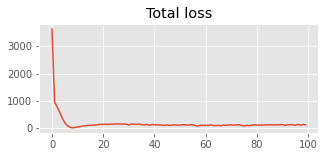

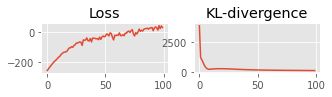

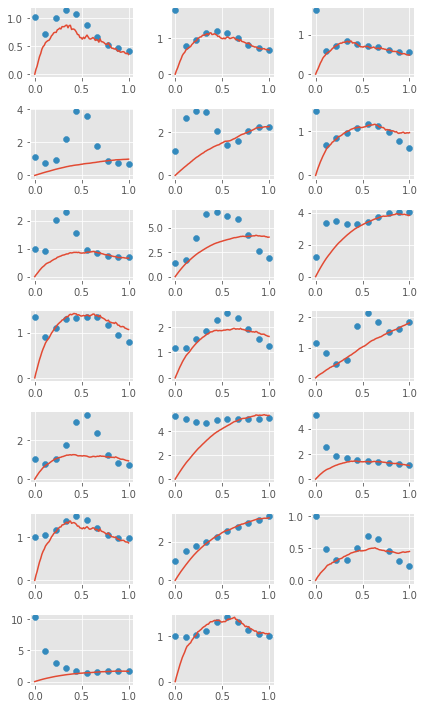

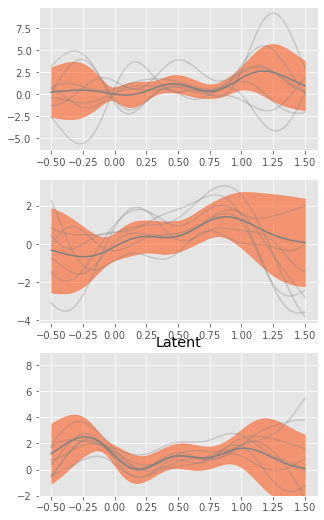

In [13]:
plotter = Plotter(model, gene_names, t_inducing)

tol = 1e-3
plotter.plot_losses(trainer, last_x=100)
plotter.plot_genes(t_predict, t_scatter=t_observed, y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs(ylim=(-2, 9))


In [14]:
save(model, 'multitf')

FileNotFoundError: [Errno 2] No such file or directory: './saved_models/multitf.pt'

In [ ]:
model = load('nonlinear', MultiLFM, num_genes, num_tfs, t_inducing, t_observed, fixed_variance=None)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))

In [ ]:
titles = ['basal', 'decay', 'sensitivity', 'lengthscale']
datas = [np.array(trainer.basalrates)[:,:,0],
         np.array(trainer.decayrates)[:,:,0],
         np.array(trainer.sensitivities)[:,:,0],
         np.array(trainer.lengthscales)]

plt.figure(figsize=(5, 6))
for i, (title, data) in enumerate(zip(titles, datas)):
    plt.subplot(411 + i)
    plt.title(title)
    # if data.ndim > 1:
    #     for j in range(data.shape[1]):

    plt.plot(data)